# Homework 4

## 2. Grouping songs together!

### The final goal is to group songs into similar genres!

__Libraries:__

In [4]:
import pandas as pd
import numpy as np
from tqdm import tqdm

## [2.1] Getting your data!

You are supposed to create one single data set by merging __tracks.csv, features.csv and echonest.csv__. It's your job to find the correct key to join your data sets together. You should end up with a data set of ~13K rows.

First of all I will import using pandas the csv file.

In [5]:
echonest = pd.read_csv('echonest.csv')

In [6]:
features = pd.read_csv('features.csv')

In [7]:
tracks = pd.read_csv('tracks.csv')

Let's get an info on the data:

In [8]:
df_list = [echonest, features, tracks]

for df in df_list:
    print(df.shape)

(13129, 250)
(106574, 519)
(106574, 53)


We can see that the only shape share by the different dataframes is only the number of rows of the features and tracks one.

Now we can search if they share common columns for which we can start our merging.

In [9]:
col = []

for df in df_list:
    col.append(set(df.columns))

In [10]:
common_labels = set.intersection(*col)
common_labels

{'track_id'}

We can see that the only common features is the track_id, let's see the common part share by that column.

In [14]:
import functions   # import the functions.py file

In [94]:
class ddisplay(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [13]:
echonestDF = functions.make_df("", echonest["track_id"])
featuresDF = functions.make_df("", features["track_id"])
trackDF = functions.make_df("", tracks["track_id"])

ddisplay("echonestDF.head()","featuresDF.head()","trackDF.head()")

""
track_id
2
3
5
10
134
""
track_id
2
3


The are common values in the track id, i.e the column means the same for each dataset and we can marge then along the row with similar value.

In [15]:
dataset = pd.concat([echonest, features, tracks], axis=1, join = 'inner')

In [16]:
dataset = dataset.loc[:,~dataset.columns.duplicated()]  # removing duplicate columns

In [17]:
dataset.shape

(13129, 820)

We achieve a dataframe of ~13k rows

In [18]:
del echonest
del features
del tracks

Let's view all the columns of the dataset

In [19]:
pd.set_option('display.max_columns', None)

In [20]:
dataset.head(3)

,track_id,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,metadata_album_date,metadata_album_name,metadata_artist_latitude,metadata_artist_location,metadata_artist_longitude,metadata_artist_name,metadata_release,ranks_artist_discovery_rank,ranks_artist_familiarity_rank,ranks_artist_hotttnesss_rank,ranks_song_currency_rank,ranks_song_hotttnesss_rank,social_features_artist_discovery,social_features_artist_familiarity,social_features_artist_hotttnesss,social_features_song_currency,social_features_song_hotttnesss,temporal_features_000,temporal_features_001,temporal_features_002,temporal_features_003,temporal_features_004,temporal_features_005,temporal_features_006,temporal_features_007,temporal_features_008,temporal_features_009,temporal_features_010,temporal_features_011,temporal_features_012,temporal_features_013,temporal_features_014,temporal_features_015,temporal_features_016,temporal_features_017,temporal_features_018,temporal_features_019,temporal_features_020,temporal_features_021,temporal_features_022,temporal_features_023,temporal_features_024,temporal_features_025,temporal_features_026,temporal_features_027,temporal_features_028,temporal_features_029,temporal_features_030,temporal_features_031,temporal_features_032,temporal_features_033,temporal_features_034,temporal_features_035,temporal_features_036,temporal_features_037,temporal_features_038,temporal_features_039,temporal_features_040,temporal_features_041,temporal_features_042,temporal_features_043,temporal_features_044,temporal_features_045,temporal_features_046,temporal_features_047,temporal_features_048,temporal_features_049,temporal_features_050,temporal_features_051,temporal_features_052,temporal_features_053,temporal_features_054,temporal_features_055,temporal_features_056,temporal_features_057,temporal_features_058,temporal_features_059,temporal_features_060,temporal_features_061,temporal_features_062,temporal_features_063,temporal_features_064,temporal_features_065,temporal_features_066,temporal_features_067,temporal_features_068,temporal_features_069,temporal_features_070,temporal_features_071,temporal_features_072,temporal_features_073,temporal_features_074,temporal_features_075,temporal_features_076,temporal_features_077,temporal_features_078,temporal_features_079,temporal_features_080,temporal_features_081,temporal_features_082,temporal_features_083,temporal_features_084,temporal_features_085,temporal_features_086,temporal_features_087,temporal_features_088,temporal_features_089,temporal_features_090,temporal_features_091,temporal_features_092,temporal_features_093,temporal_features_094,temporal_features_095,temporal_features_096,temporal_features_097,temporal_features_098,temporal_features_099,temporal_features_100,temporal_features_101,temporal_features_102,temporal_features_103,temporal_features_104,temporal_features_105,temporal_features_106,temporal_features_107,temporal_features_108,temporal_features_109,temporal_features_110,temporal_features_111,temporal_features_112,temporal_features_113,temporal_features_114,temporal_features_115,temporal_features_116,temporal_features_117,temporal_features_118,temporal_features_119,temporal_features_120,temporal_features_121,temporal_features_122,temporal_features_123,temporal_features_124,temporal_features_125,temporal_features_126,temporal_features_127,temporal_features_128,temporal_features_129,temporal_features_130,temporal_features_131,temporal_features_132,temporal_features_133,temporal_features_134,temporal_features_135,temporal_features_136,temporal_features_137,temporal_features_138,temporal_features_139,temporal_features_140,temporal_features_141,temporal_features_142,temporal_features_143,temporal_features_144,temporal_features_145,temporal_features_146,temporal_features_147,temporal_features_148,temporal_features_149,temporal_features_150,tempor

### Cleaning the dataset

__Remove all the columns with NaN value:__

In [23]:
NaN_columns = dataset.isna().sum() / dataset.shape[0] 

In [24]:
NaN_columns[NaN_columns > 0].nsmallest(10) # view the smallest columns with missing data

artist_date_created         0.001295
track_language_code         0.002742
track_license               0.003961
album_title                 0.014396
album_date_created          0.026430
album_type                  0.032523
album_information           0.211745
album_date_released         0.229263
artist_website              0.246401
metadata_artist_latitude    0.255846
dtype: float64

In [25]:
Missing50 = NaN_columns[NaN_columns > 50/100]  # view 50% of missing data
print(Missing50)
print("\nMinimums percentage:\n",Missing50.nsmallest(3))

metadata_album_date              0.793054
metadata_album_name              0.781248
ranks_artist_discovery_rank      0.784827
ranks_artist_familiarity_rank    0.784827
ranks_artist_hotttnesss_rank     0.784904
ranks_song_currency_rank         0.845152
ranks_song_hotttnesss_rank       0.831975
album_engineer                   0.685201
album_producer                   0.665854
artist_active_year_begin         0.653591
artist_active_year_end           0.912179
artist_associated_labels         0.746287
artist_related_projects          0.764415
artist_wikipedia_page            0.869373
track_composer                   0.950796
track_date_recorded              0.656943
track_information                0.909666
track_lyricist                   0.994287
track_publisher                  0.989108
dtype: float64

Minimums percentage:
 artist_active_year_begin    0.653591
track_date_recorded         0.656943
album_producer              0.665854
dtype: float64


In [26]:
# take the list of the index to drop
Missing50 = list(Missing50.index.values)

__Removing empty columns:__

In [27]:
Empty = (dataset == '[]' ).sum(axis = 0) / dataset.shape[0] 
EmptyCols = Empty[Empty > 0]

In [28]:
EmptyCols

album_tags          0.918349
artist_tags         0.005332
track_genres        0.015538
track_genres_all    0.015538
track_tags          0.916064
dtype: float64

In [29]:
EmptyCols = list(Empty[Empty > 90/100].index.values) # only the 90% of missing data
EmptyCols

['album_tags', 'track_tags']

__Identify the genre columns:__

In [30]:
genreDrop = ['track_genres_all', 'track_genres', 'track_genre_top' ]
dataset.loc[:, genreDrop].head()

,track_genres_all,track_genres,track_genre_top
0,[21],[21],Hip-Hop
1,[21],[21],Hip-Hop
2,[21],[21],Hip-Hop
3,[10],[10],Pop
4,"[17, 10, 76, 103]","[76, 103]",NaN


In [31]:
dataset['track_genre_top'].unique()

array(['Hip-Hop', 'Pop', nan, 'Rock', 'Experimental', 'Folk', 'Jazz',
       'Electronic', 'Spoken', 'International', 'Soul-RnB', 'Blues',
       'Country', 'Classical', 'Old-Time / Historic', 'Instrumental',
       'Easy Listening'], dtype=object)

__The split columns:__

There are one column that the creator of the dataset use for let us do classification, we can't use it.

In [34]:
splitDrop = ['set_split', 'set_subset']
print(dataset.set_split.unique())

['training' 'validation' 'test']


In [35]:
dataset.loc[:, splitDrop].head()

,set_split,set_subset
0,training,small
1,training,medium
2,training,small
3,training,small
4,training,large


__About: The location__

In [36]:
dataset.loc[:, ['artist_location','artist_latitude', 'artist_longitude',
                'metadata_artist_location', 'metadata_artist_latitude', 'metadata_artist_longitude']].head(5)

,artist_location,artist_latitude,artist_longitude,metadata_artist_location,metadata_artist_latitude,metadata_artist_longitude
0,New Jersey,40.058324,-74.405661,"Georgia, US",32.6783,-83.2230
1,New Jersey,40.058324,-74.405661,"Georgia, US",32.6783,-83.2230
2,New Jersey,40.058324,-74.405661,"Georgia, US",32.6783,-83.2230
3,NaN,NaN,NaN,"Philadelphia, PA, US",39.9523,-75.1624
4,Colchester England,51.895927,0.891874,"Georgia, US",32.6783,-83.2230


In [37]:
print("meta: ", dataset['metadata_artist_location'].isna().sum(), "\nNo_meta: ",
      dataset['artist_location'].isna().sum())

meta:  3359 
No_meta:  4884


I want to fill the smaller variables (i.e the meta- ) with 0.

In [38]:
location = ['metadata_artist_latitude', 'metadata_artist_longitude']
dataset[location] = dataset[location].fillna(0)

Merging the column in a unique column that store the __Country__

In [39]:
def CountryTE(row):
    try:
         out = functions.country("{}, {}".format(row['metadata_artist_latitude'],
                                       row['metadata_artist_longitude']))
    except:
         out = "NA"
    return out

In [ ]:
dataset["Country"] = dataset.progress_apply(lambda row : CountryTE(row), axis=1)

Loading the Country.csv to avoid re-do all the parsing location

In [41]:
country = pd.read_csv('Country_entries.csv', usecols = ["Country"])

In [42]:
dataset["Country"] = country

In [43]:
dataset.loc[:, ['track_id',"Country"]].head(14)

,track_id,Country
0,2,United States
1,3,United States
2,5,United States
3,10,United States
4,134,United States
5,139,United States
6,140,United States
7,141,NaN
8,142,United States
9,144,United States


Replace the missing data with NA (i.e. Not Available)

In [44]:
dataset["Country"] = dataset["Country"].fillna("NA")

In [46]:
print(dataset["Country"].unique())

['United States' 'NA' 'Canada' 'Colombia' 'España' '日本' 'Éire / Ireland'
 'United Kingdom' 'France' 'Sverige' 'Brasil' 'Nederland' 'Philippines'
 'België / Belgique / Belgien' 'Indonesia' 'México' 'Россия' 'Australia'
 'Italia' 'Україна' 'Türkiye' 'ישראל' 'România' 'Norge' 'Venezuela'
 'Côte d’Ivoire' 'ኢትዮጵያ' 'Österreich' 'Chile' 'Latvija' 'Deutschland'
 'Danmark' 'South Africa' 'Hrvatska' 'Polska' 'Česko' 'Argentina' 'Rwanda'
 'Magyarország' 'New Zealand / Aotearoa' 'Србија'
 'Schweiz/Suisse/Svizzera/Svizra' 'Suomi / Finland' 'India' 'Shqipëria'
 '中国' 'Lietuva' 'Costa Rica' 'საქართველო' 'Malaysia' '대한민국' 'Panamá'
 'Mauritius' 'The Bahamas' 'Mali' '臺灣' 'Ελλάς' 'Guatemala' 'Slovensko'
 'Uruguay' 'Бългaрия' 'Sénégal' 'ประเทศไทย' 'Singapore' 'Bolivia' 'Ísland'
 'Portugal' 'República Dominicana' 'Slovenija' 'Беларусь' 'Perú'
 'Lëtzebuerg' 'Jamaica']


Drop the other location columns

In [47]:
LocationDrop = ['artist_location','artist_latitude', 'artist_longitude',
                'metadata_artist_location', 'metadata_artist_latitude', 'metadata_artist_longitude']

__About: the language:__

In [48]:
language = dataset.track_language_code.unique()
language

array(['en', 'es', nan, 'fi', 'pt', 'tr', 'sw', 'el', 'ar', 'pl', 'id',
       'tw', 'eu', 'ms', 'fr', 'ty', 'hy', 'hi', 'vi', 'ja', 'tl', 'it',
       'my', 'gu', 'zh', 'uk', 'az', 'sr', 'lt', 'th', 'bg', 'de', 'no',
       'ko', 'uz', 'ka', 'ha', 'sk', 'nl', 'bm'], dtype=object)

We can see a NaN value so we will refill it whit a "NA"

In [49]:
dataset.track_language_code = dataset.track_language_code.fillna("NA")

__About: artist name__

In [50]:
art = ['metadata_artist_name','metadata_release','artist_name']

In [51]:
dataset[art].head(10) # decide to store only "metadata_artist_name","metadata_release"

,metadata_artist_name,metadata_release,artist_name
0,AWOL,AWOL - A Way Of Life,AWOL
1,AWOL,AWOL - A Way Of Life,AWOL
2,AWOL,AWOL - A Way Of Life,AWOL
3,Kurt Vile,Constant Hitmaker,Kurt Vile
4,AWOL,AWOL - A Way Of Life,Nicky Cook
5,Alec K. Redfearn and the Eyesores,Every Man For Himself,Nicky Cook
6,Alec K. Redfearn and the Eyesores,The Blind Spot,Nicky Cook
7,Alec K. Redfearn and the Eyesores,Every Man For Himself,Nicky Cook
8,Alec K. Redfearn and the Eyesores,The Quiet Room,Nicky Cook
9,Amoebic Ensemble,Amoebiasis,AWOL


### Finish the cleaning

In [53]:
df = dataset.copy()

Drop the columns

In [54]:
df = df.drop(columns = Missing50 )
df = df.drop(columns = EmptyCols)
#df = df.drop(columns = genreDrop )
df = df.drop(columns = splitDrop)
df = df.drop(columns = LocationDrop)
df = df.drop(columns = 'artist_name')

In [55]:
print("Cleaned: {}".format(df.shape), "Original: {}".format(dataset.shape))

Cleaned: (13129, 791) Original: (13129, 821)


In [57]:
df.isna().sum().nlargest(13)  # all can fillable with "NA"

artist_members                 6357
track_genre_top                4558
artist_bio                     3535
artist_website                 3235
album_date_released            3010
album_information              2780
album_type                      427
album_date_created              347
album_title                     189
track_license                    52
artist_date_created              17
track_id                          0
audio_features_acousticness       0
dtype: int64

In [58]:
df = df.fillna("NA")

In [61]:
df.head(1)

,track_id,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,metadata_artist_name,metadata_release,social_features_artist_discovery,social_features_artist_familiarity,social_features_artist_hotttnesss,social_features_song_currency,social_features_song_hotttnesss,temporal_features_000,temporal_features_001,temporal_features_002,temporal_features_003,temporal_features_004,temporal_features_005,temporal_features_006,temporal_features_007,temporal_features_008,temporal_features_009,temporal_features_010,temporal_features_011,temporal_features_012,temporal_features_013,temporal_features_014,temporal_features_015,temporal_features_016,temporal_features_017,temporal_features_018,temporal_features_019,temporal_features_020,temporal_features_021,temporal_features_022,temporal_features_023,temporal_features_024,temporal_features_025,temporal_features_026,temporal_features_027,temporal_features_028,temporal_features_029,temporal_features_030,temporal_features_031,temporal_features_032,temporal_features_033,temporal_features_034,temporal_features_035,temporal_features_036,temporal_features_037,temporal_features_038,temporal_features_039,temporal_features_040,temporal_features_041,temporal_features_042,temporal_features_043,temporal_features_044,temporal_features_045,temporal_features_046,temporal_features_047,temporal_features_048,temporal_features_049,temporal_features_050,temporal_features_051,temporal_features_052,temporal_features_053,temporal_features_054,temporal_features_055,temporal_features_056,temporal_features_057,temporal_features_058,temporal_features_059,temporal_features_060,temporal_features_061,temporal_features_062,temporal_features_063,temporal_features_064,temporal_features_065,temporal_features_066,temporal_features_067,temporal_features_068,temporal_features_069,temporal_features_070,temporal_features_071,temporal_features_072,temporal_features_073,temporal_features_074,temporal_features_075,temporal_features_076,temporal_features_077,temporal_features_078,temporal_features_079,temporal_features_080,temporal_features_081,temporal_features_082,temporal_features_083,temporal_features_084,temporal_features_085,temporal_features_086,temporal_features_087,temporal_features_088,temporal_features_089,temporal_features_090,temporal_features_091,temporal_features_092,temporal_features_093,temporal_features_094,temporal_features_095,temporal_features_096,temporal_features_097,temporal_features_098,temporal_features_099,temporal_features_100,temporal_features_101,temporal_features_102,temporal_features_103,temporal_features_104,temporal_features_105,temporal_features_106,temporal_features_107,temporal_features_108,temporal_features_109,temporal_features_110,temporal_features_111,temporal_features_112,temporal_features_113,temporal_features_114,temporal_features_115,temporal_features_116,temporal_features_117,temporal_features_118,temporal_features_119,temporal_features_120,temporal_features_121,temporal_features_122,temporal_features_123,temporal_features_124,temporal_features_125,temporal_features_126,temporal_features_127,temporal_features_128,temporal_features_129,temporal_features_130,temporal_features_131,temporal_features_132,temporal_features_133,temporal_features_134,temporal_features_135,temporal_features_136,temporal_features_137,temporal_features_138,temporal_features_139,temporal_features_140,temporal_features_141,temporal_features_142,temporal_features_143,temporal_features_144,temporal_features_145,temporal_features_146,temporal_features_147,temporal_features_148,temporal_features_149,temporal_features_150,temporal_features_151,temporal_features_152,temporal_features_153,temporal_features_154,temporal_features_155,temporal_features_156,temporal_features_157,temporal_features_158,temporal_features_159,temporal_features_160,temporal_features_161,temporal_features_1

Saving the step

In [60]:
df.to_csv('dataset_clean_v2.csv', index = False)

## [2.2] Choose your features (variables)!

__Fixing the dataset for the PCA__

In [145]:
PCA_df = df.copy()

__No usefull information__

In [146]:
InformationDrop = ['track_id','album_id', 'artist_id',
                   'album_title', 'album_date_created', 'album_date_released',
                   'album_information','album_type',
                   'artist_tags','artist_date_created', 
                   'artist_website','artist_bio','artist_members',
                   'track_number','track_title','track_date_created',
                   'track_license','album_tracks','metadata_artist_name','metadata_release']

df.loc[:, InformationDrop].head(2)

# we cannot use features genre so either text mining in the artist_bio or tags
# 'metadata_album_name', 'metadata_album_date', 'track_date_recorded' are in missing50

,track_id,album_id,artist_id,album_title,album_date_created,album_date_released,album_information,album_type,artist_tags,artist_date_created,artist_website,artist_bio,artist_members,track_number,track_title,track_date_created,track_license,album_tracks,metadata_artist_name,metadata_release
0,2,1,1,AWOL - A Way Of Life,2008-11-26 01:44:45,2009-01-05 00:00:00,<p></p>,Album,['awol'],2008-11-26 01:42:32,http://www.AzillionRecords.blogspot.com,"<p>A Way Of Life, A Collective of Hip-Hop from...","Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",3,Food,2008-11-26 01:48:12,Attribution-NonCommercial-ShareAlike 3.0 Inter...,7,AWOL,AWOL - A Way Of Life
1,3,1,1,AWOL - A Way Of Life,2008-11-26 01:44:45,2009-01-05 00:00:00,<p></p>,Album,['awol'],2008-11-26 01:42:32,http://www.AzillionRecords.blogspot.com,"<p>A Way Of Life, A Collective of Hip-Hop from...","Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",4,Electric Ave,2008-11-26 01:48:14,Attribution-NonCommercial-ShareAlike 3.0 Inter...,7,AWOL,AWOL - A Way Of Life


Drop the columns:
* InformationDrop
* genreDrop

In [147]:
PCA_df = PCA_df.drop(columns = InformationDrop)
PCA_df = PCA_df.drop(columns = genreDrop)

In [148]:
print("PCA: ",PCA_df.shape)

PCA:  (13129, 768)


Converting __language__ and __Country__ in numerical variable and store it to avoid the elimination of those columns in the PCA process:

In [149]:
language = PCA_df["track_language_code"].unique()

In [150]:
language_parser = dict(zip(language, range(len(language))))
print(language_parser)

{'en': 0, 'es': 1, 'NA': 2, 'fi': 3, 'pt': 4, 'tr': 5, 'sw': 6, 'el': 7, 'ar': 8, 'pl': 9, 'id': 10, 'tw': 11, 'eu': 12, 'ms': 13, 'fr': 14, 'ty': 15, 'hy': 16, 'hi': 17, 'vi': 18, 'ja': 19, 'tl': 20, 'it': 21, 'my': 22, 'gu': 23, 'zh': 24, 'uk': 25, 'az': 26, 'sr': 27, 'lt': 28, 'th': 29, 'bg': 30, 'de': 31, 'no': 32, 'ko': 33, 'uz': 34, 'ka': 35, 'ha': 36, 'sk': 37, 'nl': 38, 'bm': 39}


In [151]:
country = PCA_df["Country"].unique()

In [152]:
country_parser = dict(zip(country, range(len(country))))
print(country_parser)

{'United States': 0, 'NA': 1, 'Canada': 2, 'Colombia': 3, 'España': 4, '日本': 5, 'Éire / Ireland': 6, 'United Kingdom': 7, 'France': 8, 'Sverige': 9, 'Brasil': 10, 'Nederland': 11, 'Philippines': 12, 'België / Belgique / Belgien': 13, 'Indonesia': 14, 'México': 15, 'Россия': 16, 'Australia': 17, 'Italia': 18, 'Україна': 19, 'Türkiye': 20, 'ישראל': 21, 'România': 22, 'Norge': 23, 'Venezuela': 24, 'Côte d’Ivoire': 25, 'ኢትዮጵያ': 26, 'Österreich': 27, 'Chile': 28, 'Latvija': 29, 'Deutschland': 30, 'Danmark': 31, 'South Africa': 32, 'Hrvatska': 33, 'Polska': 34, 'Česko': 35, 'Argentina': 36, 'Rwanda': 37, 'Magyarország': 38, 'New Zealand / Aotearoa': 39, 'Србија': 40, 'Schweiz/Suisse/Svizzera/Svizra': 41, 'Suomi / Finland': 42, 'India': 43, 'Shqipëria': 44, '中国': 45, 'Lietuva': 46, 'Costa Rica': 47, 'საქართველო': 48, 'Malaysia': 49, '대한민국': 50, 'Panamá': 51, 'Mauritius': 52, 'The Bahamas': 53, 'Mali': 54, '臺灣': 55, 'Ελλάς': 56, 'Guatemala': 57, 'Slovensko': 58, 'Uruguay': 59, 'Бългaрия': 60, 

In [153]:
# parsing 
for i in range(PCA_df.shape[0]):
    PCA_df.loc[i, "track_language_code"] = language_parser[PCA_df.track_language_code.loc[i]]

In [154]:
for i in range(PCA_df.shape[0]):
    PCA_df.loc[i, "Country"] = country_parser[PCA_df.Country.loc[i]]

__Normalize my data:__

In [155]:
#standardize my data
PCA_df = (PCA_df - PCA_df.mean())/PCA_df.std()
PCA_df.head(2).style
#looking at all my remaining variables to check if their presence make sense for PCA

,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,social_features_artist_discovery,social_features_artist_familiarity,social_features_artist_hotttnesss,social_features_song_currency,social_features_song_hotttnesss,temporal_features_000,temporal_features_001,temporal_features_002,temporal_features_003,temporal_features_004,temporal_features_005,temporal_features_006,temporal_features_007,temporal_features_008,temporal_features_009,temporal_features_010,temporal_features_011,temporal_features_012,temporal_features_013,temporal_features_014,temporal_features_015,temporal_features_016,temporal_features_017,temporal_features_018,temporal_features_019,temporal_features_020,temporal_features_021,temporal_features_022,temporal_features_023,temporal_features_024,temporal_features_025,temporal_features_026,temporal_features_027,temporal_features_028,temporal_features_029,temporal_features_030,temporal_features_031,temporal_features_032,temporal_features_033,temporal_features_034,temporal_features_035,temporal_features_036,temporal_features_037,temporal_features_038,temporal_features_039,temporal_features_040,temporal_features_041,temporal_features_042,temporal_features_043,temporal_features_044,temporal_features_045,temporal_features_046,temporal_features_047,temporal_features_048,temporal_features_049,temporal_features_050,temporal_features_051,temporal_features_052,temporal_features_053,temporal_features_054,temporal_features_055,temporal_features_056,temporal_features_057,temporal_features_058,temporal_features_059,temporal_features_060,temporal_features_061,temporal_features_062,temporal_features_063,temporal_features_064,temporal_features_065,temporal_features_066,temporal_features_067,temporal_features_068,temporal_features_069,temporal_features_070,temporal_features_071,temporal_features_072,temporal_features_073,temporal_features_074,temporal_features_075,temporal_features_076,temporal_features_077,temporal_features_078,temporal_features_079,temporal_features_080,temporal_features_081,temporal_features_082,temporal_features_083,temporal_features_084,temporal_features_085,temporal_features_086,temporal_features_087,temporal_features_088,temporal_features_089,temporal_features_090,temporal_features_091,temporal_features_092,temporal_features_093,temporal_features_094,temporal_features_095,temporal_features_096,temporal_features_097,temporal_features_098,temporal_features_099,temporal_features_100,temporal_features_101,temporal_features_102,temporal_features_103,temporal_features_104,temporal_features_105,temporal_features_106,temporal_features_107,temporal_features_108,temporal_features_109,temporal_features_110,temporal_features_111,temporal_features_112,temporal_features_113,temporal_features_114,temporal_features_115,temporal_features_116,temporal_features_117,temporal_features_118,temporal_features_119,temporal_features_120,temporal_features_121,temporal_features_122,temporal_features_123,temporal_features_124,temporal_features_125,temporal_features_126,temporal_features_127,temporal_features_128,temporal_features_129,temporal_features_130,temporal_features_131,temporal_features_132,temporal_features_133,temporal_features_134,temporal_features_135,temporal_features_136,temporal_features_137,temporal_features_138,temporal_features_139,temporal_features_140,temporal_features_141,temporal_features_142,temporal_features_143,temporal_features_144,temporal_features_145,temporal_features_146,temporal_features_147,temporal_features_148,temporal_features_149,temporal_features_150,temporal_features_151,temporal_features_152,temporal_features_153,temporal_features_154,temporal_features_155,temporal_features_156,temporal_features_157,temporal_features_158,temporal_features_159,temporal_features_160,temporal_features_161,temporal_features_162,temporal_features_163,temporal_features_164,

In [156]:
PCA_df.tail(2).style

,audio_features_acousticness,audio_features_danceability,audio_features_energy,audio_features_instrumentalness,audio_features_liveness,audio_features_speechiness,audio_features_tempo,audio_features_valence,social_features_artist_discovery,social_features_artist_familiarity,social_features_artist_hotttnesss,social_features_song_currency,social_features_song_hotttnesss,temporal_features_000,temporal_features_001,temporal_features_002,temporal_features_003,temporal_features_004,temporal_features_005,temporal_features_006,temporal_features_007,temporal_features_008,temporal_features_009,temporal_features_010,temporal_features_011,temporal_features_012,temporal_features_013,temporal_features_014,temporal_features_015,temporal_features_016,temporal_features_017,temporal_features_018,temporal_features_019,temporal_features_020,temporal_features_021,temporal_features_022,temporal_features_023,temporal_features_024,temporal_features_025,temporal_features_026,temporal_features_027,temporal_features_028,temporal_features_029,temporal_features_030,temporal_features_031,temporal_features_032,temporal_features_033,temporal_features_034,temporal_features_035,temporal_features_036,temporal_features_037,temporal_features_038,temporal_features_039,temporal_features_040,temporal_features_041,temporal_features_042,temporal_features_043,temporal_features_044,temporal_features_045,temporal_features_046,temporal_features_047,temporal_features_048,temporal_features_049,temporal_features_050,temporal_features_051,temporal_features_052,temporal_features_053,temporal_features_054,temporal_features_055,temporal_features_056,temporal_features_057,temporal_features_058,temporal_features_059,temporal_features_060,temporal_features_061,temporal_features_062,temporal_features_063,temporal_features_064,temporal_features_065,temporal_features_066,temporal_features_067,temporal_features_068,temporal_features_069,temporal_features_070,temporal_features_071,temporal_features_072,temporal_features_073,temporal_features_074,temporal_features_075,temporal_features_076,temporal_features_077,temporal_features_078,temporal_features_079,temporal_features_080,temporal_features_081,temporal_features_082,temporal_features_083,temporal_features_084,temporal_features_085,temporal_features_086,temporal_features_087,temporal_features_088,temporal_features_089,temporal_features_090,temporal_features_091,temporal_features_092,temporal_features_093,temporal_features_094,temporal_features_095,temporal_features_096,temporal_features_097,temporal_features_098,temporal_features_099,temporal_features_100,temporal_features_101,temporal_features_102,temporal_features_103,temporal_features_104,temporal_features_105,temporal_features_106,temporal_features_107,temporal_features_108,temporal_features_109,temporal_features_110,temporal_features_111,temporal_features_112,temporal_features_113,temporal_features_114,temporal_features_115,temporal_features_116,temporal_features_117,temporal_features_118,temporal_features_119,temporal_features_120,temporal_features_121,temporal_features_122,temporal_features_123,temporal_features_124,temporal_features_125,temporal_features_126,temporal_features_127,temporal_features_128,temporal_features_129,temporal_features_130,temporal_features_131,temporal_features_132,temporal_features_133,temporal_features_134,temporal_features_135,temporal_features_136,temporal_features_137,temporal_features_138,temporal_features_139,temporal_features_140,temporal_features_141,temporal_features_142,temporal_features_143,temporal_features_144,temporal_features_145,temporal_features_146,temporal_features_147,temporal_features_148,temporal_features_149,temporal_features_150,temporal_features_151,temporal_features_152,temporal_features_153,temporal_features_154,temporal_features_155,temporal_features_156,temporal_features_157,temporal_features_158,temporal_features_159,temporal_features_160,temporal_features_161,temporal_features_162,temporal_features_163,temporal_features_164,

Saving the columns to be dropped later for the PCA

In [157]:
toStore = ['track_bit_rate','track_comments','track_duration','track_favorites','track_interest',
           'track_language_code','track_listens','Country']

In [158]:
PCA_df.to_csv('ColumnsStore.csv', index = False, columns = toStore)

In [159]:
PCA_df = PCA_df.drop(columns = toStore)

Saving the PCA_df step

In [160]:
PCA_df.to_csv('PCA_v2.csv', index = False)

### Let's do the PCA

In [161]:
from sklearn.decomposition import PCA

In [162]:
tmp = PCA_df.copy()
del PCA_df

In [163]:
# Inspect correlation between the variable 

c = tmp.corr().abs()
s = c.unstack()
so = s.sort_values(kind = "quicksort")

In [164]:
#check if there are variables with correlation close to one, move the so vector to check what you want
print(so[-820:-768])

temporal_features_116        temporal_features_104          0.990529
temporal_features_104        temporal_features_116          0.990529
temporal_features_108        temporal_features_096          0.990590
temporal_features_096        temporal_features_108          0.990590
temporal_features_102        temporal_features_114          0.991396
temporal_features_114        temporal_features_102          0.991396
spectral_contrast_median_04  spectral_contrast_mean_04      0.991717
spectral_contrast_mean_04    spectral_contrast_median_04    0.991717
temporal_features_109        temporal_features_097          0.991727
temporal_features_097        temporal_features_109          0.991727
mfcc_median_03               mfcc_mean_03                   0.991790
mfcc_mean_03                 mfcc_median_03                 0.991790
mfcc_median_05               mfcc_mean_05                   0.991988
mfcc_mean_05                 mfcc_median_05                 0.991988
temporal_features_100        tempo

In [166]:
tmp2 = tmp.drop(['temporal_features_205','temporal_features_221','mfcc_median_08','mfcc_median_14',
                           'mfcc_median_12','mfcc_median_11','mfcc_median_10','mfcc_median_07',
                           'spectral_contrast_median_01','mfcc_median_09','mfcc_median_15','mfcc_median_16',
                           'mfcc_median_13','spectral_contrast_median_02','mfcc_median_04','mfcc_median_18',
                           'mfcc_median_06','spectral_contrast_median_03','mfcc_median_20','mfcc_median_19',
                           'mfcc_median_17','mfcc_median_05','mfcc_median_03','temporal_features_110','temporal_features_112',
                           'temporal_features_109','spectral_contrast_median_04','temporal_features_114',
                           'temporal_features_096','temporal_features_116','spectral_contrast_median_05',
                           'mfcc_median_01','mfcc_median_02','spectral_contrast_median_07','spectral_contrast_median_06',
                           'temporal_features_193','temporal_features_119',
                           'temporal_features_209','temporal_features_111'],axis=1)

In [167]:
tmp2.shape

(13129, 721)

We will apply PCA's method because it has good performance with quantitative variables which are the only ones that we have left in the dataset except for categorial variables which have been changed in numeric (only for the categorial variables which are of strong significance for the data), the performance of the algorithm come down if the data isn't centered in the case that we use correlation matrix or if the data isn't standardized and we use varcov matrix. 

The goal is to project our d-dimensional dataset into k-dimensional dataset, where k<d, therefore all my k final components will have to explain a part of the variance of my d-dimensional data, mantaining certain characteristics, like the fact that the components must be indipendent from each other.

How we can see from the next cells the number of principal components needed to explain at least 70% of the total variance.

In [169]:
pca = PCA(n_components=74) 
principalcompo = pca.fit_transform(tmp2)
principal_df = pd.DataFrame(data = principalcompo)    
principal_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73
0,1.498377,-2.975119,3.228912,-0.065069,-3.483338,3.941247,3.419965,2.983031,-5.330298,-1.510717,5.086454,2.354999,0.361953,-4.291149,0.890735,0.857849,-1.881136,-1.269846,-1.512341,2.926561,0.315568,-1.192438,1.008759,-1.073419,-0.718808,-1.256031,0.106789,1.889250,-2.034227,-3.006384,-1.726582,-0.071612,-0.967345,1.560428,0.439362,0.196789,-2.707028,1.167046,-1.820653,2.287569,-0.078528,0.576178,-0.552504,-2.609759,-0.674297,-0.194256,-2.537102,-0.115209,-1.002186,1.394668,-2.182214,-0.737963,-0.640403,-0.164745,-0.020795,-0.275903,-0.684313,0.209496,-0.655843,0.438295,1.296566,-0.378619,0.009629,1.202208,-0.354918,1.396616,-0.557854,-0.093157,0.493738,0.131306,0.730039,-0.544285,1.797953,0.508134
1,2.048078,-4.994700,4.364757,1.744275,-5.991289,1.874344,-3.163418,-0.596709,3.232674,2.644946,3.286756,1.915243,2.024865,-3.438396,-0.820008,-2.100463,1.649395,0.273093,-1.644849,0.419679,-0.412282,0.572512,0.437952,-1.892534,-2.262735,0.882131,0.087889,1.565773,-3.090071,1.226998,-0.677555,0.386397,1.742773,-0.389304,1.009776,0.168505,-1.420144,0.329378,-1.433588,1.539363,1.999517,0.557499,1.949603,-2.022075,-0.430916,1.313148,-2.431591,-1.525869,0.969936,-0.009842,-1.252025,-2.823157,1.674890,-0.700788,1.006105,0.034631,0.798789,1.115694,-2.106418,-1.195594,-0.075433,0.050175,-1.020227,-0.641507,-0.113629,-0.742204,-0.884731,-1.855214,1.092348,-0.800886,1.981258,0.254044,0.031979,1.124297
2,0.012151,-3.223374,1.784768,0.780307,-5.903865,1.444282,-1.652497,1.145667,-0.491450,1.584829,0.338839,1.438849,2.031040,-3.044848,1.193860,0.194609,-0.155524,0.213280,-1.153817,0.859049,0.165888,-0.442965,-0.943360,-0.312416,-0.181917,-0.198362,0.536208,2.534897,-2.847437,-0.607115,0.685972,-0.439506,2.244738,3.220845,1.404713,0.276758,0.037851,-1.309370,0.885387,0.518249,-1.166246,1.627179,0.435947,-0.514900,-0.815836,-1.089423,-1.295995,-1.261839,-0.169763,-1.241855,-0.577966,-2.513382,-0.795132,-0.194733,1.117858,-2.378367,1.368869,1.407454,-0.692104,-0.307607,3.409798,-0.727760,-0.469538,1.309851,-1.066962,0.727000,-0.897696,-0.463167,2.214505,-1.023645,0.306373,0.125250,0.152461,1.517316
3,6.435590,-0.905968,0.487196,6.094699,-3.520363,3.829310,-2.317961,-2.108484,0.814785,2.195197,3.221315,0.137243,0.884301,-1.438407,-0.974447,0.063055,2.751738,3.012127,1.550569,1.216705,-0.622583,-0.283454,3.034283,-0.522092,2.549116,0.685236,0.217035,-0.074496,-3.892866,-0.910654,-0.346449,1.266799,0.608034,-2.259812,-0.530589,2.585819,-1.766043,-2.741598,1.889558,0.216930,-4.650532,-1.135926,2.806158,-0.806411,3.087597,-0.712703,-1.940964,-3.422526,-2.659029,2.016694,-2.895598,-1.270128,1.234725,-2.332586,0.859940,-0.505843,-0.150891,0.916406,3.807852,-2.524336,0.249999,0.313899,1.633706,2.198654,0.597418,1.363950,-1.719656,0.397090,1.413849,-0.002487,0.196988,0.645448,-0.196383,-1.714221
4,-0.402873,-1.210798,-0.389366,-3.410964,-3.806326,-5.213598,-4.308156,2.438313,1.619000,1.760479,-1.464825,4.084416,-2.658852,0.144121,0.218230,-1.219572,1.325816,4.069922,-2.266361,-2.487939,0.955819,1.221945,-0.596637,1.466886,-0.291900,-0.084966,-0.078771,-1.108050,0.262374,2.858285,-0.660891,-0.385942,-0.734303,0.183269,-0.941201,-1.053048,1.331881,-0.729620,-0.327624,0.783266,0.157935,0.802079,-0.660611,-1.249169,-0.169901,0.489372,1.540818,-1.767276,2.094271,0.272214,-1.955589,1.007154,-0.595558,-0.154562,1.923523,0.950430,0.007948,0.869164,-1.114069,-1.464722,0.820680,-0.392749,0.994446,-1.626085,-0.154055,0.085010,-0.008607,-2.390200,0.499890,1.045102,-0.125342,0.085658,0.596676,1.198611


In [170]:
print('the percentage of variance explained by the principal components is',sum(pca.explained_variance_ratio_)*100)

the percentage of variance explained by the principal components is 70.1360225197477


Recover the stored columns and put that in the principal_df done with the PCA

In [171]:
storedColumns = pd.read_csv('ColumnsStore.csv', usecols = toStore)

In [172]:
Principal = pd.concat([principal_df, storedColumns], axis = 1)

In [173]:
Principal

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,track_bit_rate,track_comments,track_duration,track_favorites,track_interest,track_language_code,track_listens,Country
0,1.498377,-2.975119,3.228912,-0.065069,-3.483338,3.941247,3.419965,2.983031,-5.330298,-1.510717,5.086454,2.354999,0.361953,-4.291149,0.890735,0.857849,-1.881136,-1.269846,-1.512341,2.926561,0.315568,-1.192438,1.008759,-1.073419,-0.718808,-1.256031,0.106789,1.889250,-2.034227,-3.006384,-1.726582,-0.071612,-0.967345,1.560428,0.439362,0.196789,-2.707028,1.167046,-1.820653,2.287569,-0.078528,0.576178,-0.552504,-2.609759,-0.674297,-0.194256,-2.537102,-0.115209,-1.002186,1.394668,-2.182214,-0.737963,-0.640403,-0.164745,-0.020795,-0.275903,-0.684313,0.209496,-0.655843,0.438295,1.296566,-0.378619,0.009629,1.202208,-0.354918,1.396616,-0.557854,-0.093157,0.493738,0.131306,0.730039,-0.544285,1.797953,0.508134,0.447789,-0.117753,-0.285160,-0.074238,0.420760,-0.112,0.010502,-0.493157
1,2.048078,-4.994700,4.364757,1.744275,-5.991289,1.874344,-3.163418,-0.596709,3.232674,2.644946,3.286756,1.915243,2.024865,-3.438396,-0.820008,-2.100463,1.649395,0.273093,-1.644849,0.419679,-0.412282,0.572512,0.437952,-1.892534,-2.262735,0.882131,0.087889,1.565773,-3.090071,1.226998,-0.677555,0.386397,1.742773,-0.389304,1.009776,0.168505,-1.420144,0.329378,-1.433588,1.539363,1.999517,0.557499,1.949603,-2.022075,-0.430916,1.313148,-2.431591,-1.525869,0.969936,-0.009842,-1.252025,-2.823157,1.674890,-0.700788,1.006105,0.034631,0.798789,1.115694,-2.106418,-1.195594,-0.075433,0.050175,-1.020227,-0.641507,-0.113629,-0.742204,-0.884731,-1.855214,1.092348,-0.800886,1.981258,0.254044,0.031979,1.124297,0.447789,-0.117753,-0.099238,-0.220389,-0.139725,-0.112,-0.200278,-0.493157
2,0.012151,-3.223374,1.784768,0.780307,-5.903865,1.444282,-1.652497,1.145667,-0.491450,1.584829,0.338839,1.438849,2.031040,-3.044848,1.193860,0.194609,-0.155524,0.213280,-1.153817,0.859049,0.165888,-0.442965,-0.943360,-0.312416,-0.181917,-0.198362,0.536208,2.534897,-2.847437,-0.607115,0.685972,-0.439506,2.244738,3.220845,1.404713,0.276758,0.037851,-1.309370,0.885387,0.518249,-1.166246,1.627179,0.435947,-0.514900,-0.815836,-1.089423,-1.295995,-1.261839,-0.169763,-1.241855,-0.577966,-2.513382,-0.795132,-0.194733,1.117858,-2.378367,1.368869,1.407454,-0.692104,-0.307607,3.409798,-0.727760,-0.469538,1.309851,-1.066962,0.727000,-0.897696,-0.463167,2.214505,-1.023645,0.306373,0.125250,0.152461,1.517316,0.447789,-0.117753,-0.182768,0.510363,-0.058273,-0.112,-0.027920,-0.493157
3,6.435590,-0.905968,0.487196,6.094699,-3.520363,3.829310,-2.317961,-2.108484,0.814785,2.195197,3.221315,0.137243,0.884301,-1.438407,-0.974447,0.063055,2.751738,3.012127,1.550569,1.216705,-0.622583,-0.283454,3.034283,-0.522092,2.549116,0.685236,0.217035,-0.074496,-3.892866,-0.910654,-0.346449,1.266799,0.608034,-2.259812,-0.530589,2.585819,-1.766043,-2.741598,1.889558,0.216930,-4.650532,-1.135926,2.806158,-0.806411,3.087597,-0.712703,-1.940964,-3.422526,-2.659029,2.016694,-2.895598,-1.270128,1.234725,-2.332586,0.859940,-0.505843,-0.150891,0.916406,3.807852,-2.524336,0.249999,0.313899,1.633706,2.198654,0.597418,1.363950,-1.719656,0.397090,1.413849,-0.002487,0.196988,0.645448,-0.196383,-1.714221,-0.543002,-0.117753,-0.304022,25.648212,9.256405,-0.112,13.226008,-0.493157
4,-0.402873,-1.210798,-0.389366,-3.410964,-3.806326,-5.213598,-4.308156,2.438313,1.619000,1.760479,-1.464825,4.084416,-2.658852,0.144121,0.218230,-1.219572,1.325816,4.069922,-2.266361,-2.487939,0.955819,1.221945,-0.596637,1.466886,-0.291900,-0.084966,-0.078771,-1.108050,0.262374,2.858285,-0.660891,-0.385942,-0.734303,0.183269,-0.941201,-1.053048,1.331881,-0.729620,-0.327624,0.783266,0.157935,0.802079,-0.660611,-1.249169,-0.169901,0.489372,1.540818,-1.767276,2.094271,0.272214,-1.955589,1.007154,-0.595558,-0.154562,1.923523,0.950430,0.007948,0.86

Saving the ultimate dataset

In [174]:
Principal.to_csv('PCA_final.csv', index = False)

## [2.3] Clustering!

In [175]:
import numpy as np
from collections import defaultdict

### Implement the K-means clustering algorithm

Explaining the kmeans algorithm:

* STEP1: choose at random k points of the dataset as set that as centroid for the clustering
* WHILE LOOP:
              we exit from the loop when, or we achive the maximum number of iteration, or the error given by
              the difference of two step of kmeans of the centroid (i.e the error matrix) has the largest 
              value less than a tolerance fixed
              
* STEP2: till convergence or exit the loop: we calculate the distance matrix D of shape (13k, n_cluster ) that store for each row the distance from each centroids and then take the index of minimum distance, i.e the membership to the cluster. Than we update the new centroids and repeat.

* At the end we compute also the cost function.

In [176]:
def Kmeans(dataset, k):
    
    # STEP1: choosing at random k points of the dataset as centroid
    u_idx = np.random.randint(0, dataset.shape[0], k)
    u_old = np.array(dataset.iloc[u_idx], dtype = np.float64)
    
    # initialize:
    # u_new >> vector of updated centroid 
    # Dist >> matrix storing the distance of the dataset from the centroid
    u_new = np.zeros((k, dataset.shape[1]))
    Dist = np.zeros((dataset.shape[0], k))
    
    # initialize the error for the while loop
    err = np.linalg.norm(u_old-u_new, ord = 'fro')
    # set a tollerance to exit the while and loop until that precision
    toll = 10**(-3)
    
    # number of max iteration
    NMAX = 300
    count = 0
    
    # while loop over the convergence
    while( (err > toll) & (count < NMAX) ):
        for i in range(dataset.shape[0]):
            # take the x row of the dataset
            x = np.array(dataset.iloc[i], dtype = np.float64)
            # computing the distance
            Dist[i] = np.sqrt(np.square(x-u_old).sum(axis=1))
        
        # using argmin I will take only the index of minimum distance from
        # the centroid, i.e the cluster
        dist_min = np.argmin(Dist, axis = 1)
        
        # C >> dictionary, conteining the list of x for each cluster
        C = defaultdict(list)
        for i in range(k):
            C[i] = list(np.where(dist_min == i)[0])
            # update the centroid
            u_new[i] = 1/len(C[i])*np.sum(dataset.iloc[C[i]])    
        
        # update the error 
        err = np.linalg.norm(u_old-u_new, ord = 'fro')
        # save the old centroid for next iteration error
        u_old = u_new.copy()
        # update the number of iteration
        count = count + 1
        
    # when exit the loop we calculate the cost function  using the
    # centroids we calculate
    dist = 0
    for i in range(k):
        idx = C[i]
        x = np.array(dataset.iloc[idx], dtype = np.float64)
        dist += np.sum(np.linalg.norm(x-u_new[i], axis = 1)**2)
    
    return C, u_new, dist

### Find the optimal number of cluster

__Elbow method from scratch using our kmeans:__

In [14]:
cost = []
for i in tqdm(range(1,17)):
    med = []
    for j in range(5):
        med.append(Kmeans(Principal, i)[1])
    cost.append(np.mean(med))

100%|███████████████████████████████████████████████████████████████████████████████| 16/16 [1:34:23<00:00, 353.96s/it]


In [15]:
import matplotlib.pyplot as plt

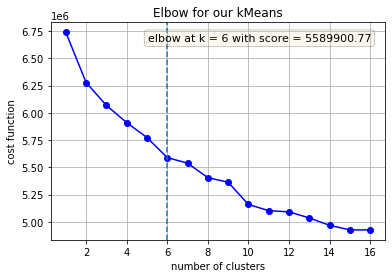

In [49]:
fig, ax = plt.subplots()
plt.plot(range(1,17), cost, '-bo')
plt.axvline(x = 6, ls = '--')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.2)
ax.text(0.29, 0.95, "elbow at k = {} with score = {:.2f}".format(6, cost[5]), transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)
plt.title('Elbow for our kMeans')
plt.xlabel('number of clusters')
plt.ylabel('cost function')
plt.grid(True)

From this plot we can say that the optimal number of cluster is k = 6, why after the k = 6 the cost function decrese more slowly.

__Silhoutte score analysis:__  __[DA SISTEMAREEEEEEEEEE]__

In [53]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

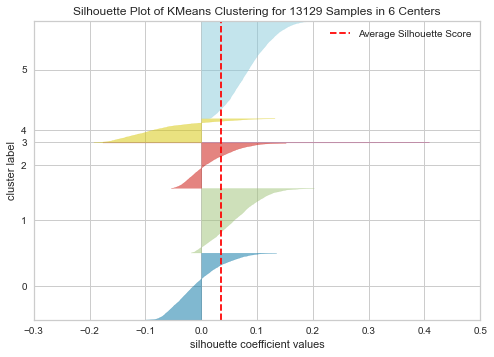

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 13129 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [40]:
model = KMeans(6, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(Principal)        # Fit the data to the visualizer
visualizer.show() 

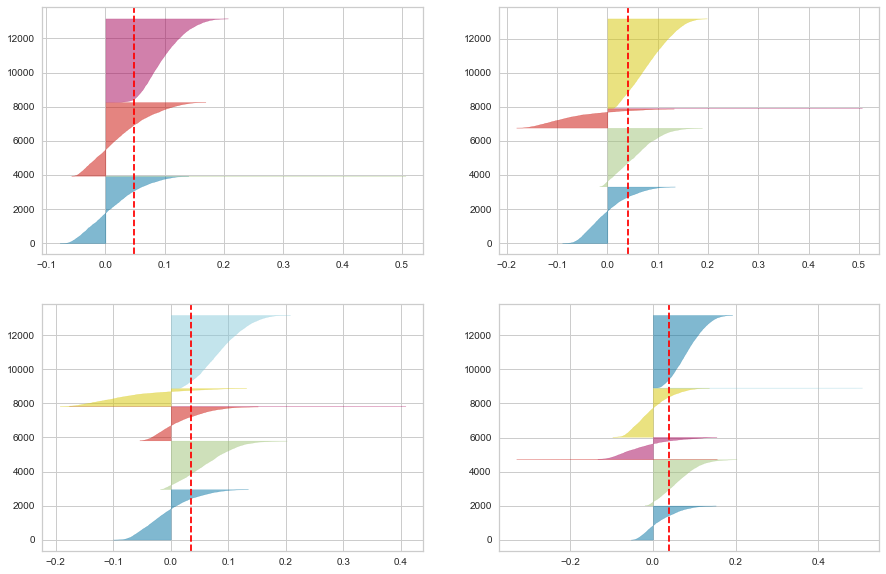

In [66]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))

n_clust = [4, 5, 6, 7]
for i in n_clust:
    model = KMeans(n_clusters = i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=ax[q-2][mod])
    visualizer.fit(Principal)

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [48]:
Silhoutte_score = []
for i in range(2, 13):
    model = KMeans(n_clusters=i,  init='k-means++', random_state=42)
    model.fit(Principal)
    score = silhouette_score(Principal, model.labels_)
    Silhoutte_score.append(score)
    print("Number clusters: {}, Silhouette score is {}".format(i, score))

Number clusters: 2, Silhouette score is 0.07547676964414408
Number clusters: 3, Silhouette score is 0.047413485788130136
Number clusters: 4, Silhouette score is 0.04806415912329984
Number clusters: 5, Silhouette score is 0.0411374784412609
Number clusters: 6, Silhouette score is 0.03542525227382431
Number clusters: 7, Silhouette score is 0.03816339500890499
Number clusters: 8, Silhouette score is 0.029784076489197443
Number clusters: 9, Silhouette score is 0.02998535866033167
Number clusters: 10, Silhouette score is 0.030103784616717744
Number clusters: 11, Silhouette score is 0.030041342815349068
Number clusters: 12, Silhouette score is 0.030774042011984352


### Run the algorithm on the data that you got from the dimensionality reduction

In [177]:
C, u, dist = Kmeans(Principal, 6)

In [178]:
print(dist)

5590393.929975008


Now I will assign to each row of the dataset its calculated cluster

In [179]:
cluster = np.zeros(Principal.shape[0], dtype = np.int64)

In [180]:
for clust,lis in C.items():
    for value in lis:
        cluster[value] = clust

In [181]:
print(np.unique(cluster))

[0 1 2 3 4 5]


### True kmeans ++      [FARE LE DIFFERENZE COL KMEAN NOSTRO]

In [71]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [61]:
our_model = KMeans(init = 'k-means++', random_state = 42)

In [63]:
visualizer = KElbowVisualizer(our_model, k = (2,20), metric = "distortion", timings = False)

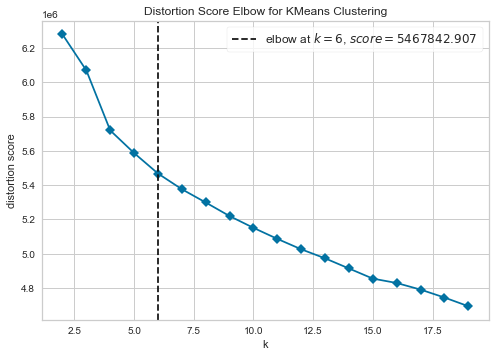

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [64]:
visualizer.fit(Principal)
visualizer.show()

## [2.4] Analysing your results!

### Selecting the variable relevant to identify the genre of a song

```
variable = [energy_features , 
            track_duration,
            track_bit_rate,
            acousticness_feateure,
            track_listens,
            Country, 
            track_language_code]
```

### If any of your selected variables are numerical (continuous or discrete), then categorize them into 4 categories

We catagorize the numerical variables in 4 categories based from the quantile of those variables

In [183]:
def classify_range(row, quintile):
    if row <= quintile[0]:
        return 1
    if row <= quintile[1]:
        return 2
    if row <= quintile[2]:
        return 3
    if row >= quintile[2]:
        return 4

In [199]:
df['track_duration'].describe()

count    13129.000000
mean       273.829385
std        371.122381
min          0.000000
25%        137.000000
50%        200.000000
75%        289.000000
max      18350.000000
Name: track_duration, dtype: float64

In [202]:
quintile_duration = list(df['track_duration'].describe()[4:7])
duration_cluster = df['track_duration'].apply(lambda row: classify_range(row, quintile_duration))
np.unique(duration_cluster)

array([1, 2, 3, 4], dtype=int64)

In [196]:
quintile_listens = list(df['track_listens'].describe()[4:7])
listens_cluster = df['track_listens'].apply(lambda row: classify_range(row, quintile_listens))

In [197]:
quintile_acousticness = list(df['audio_features_acousticness'].describe()[4:7])
acousticness_cluster = df['audio_features_acousticness'].apply(lambda row: classify_range(row, quintile_acousticness))

In [198]:
quintile_bit = list(df['track_bit_rate'].describe()[4:7])
bit_cluster = df['track_bit_rate'].apply(lambda row: classify_range(row, quintile_bit))

In [203]:
quintile_energy = list(df['audio_features_energy'].describe()[4:7])
energy_cluster = df['audio_features_energy'].apply(lambda row: classify_range(row, quintile_energy))

### With the selected variables, perform pivot tables.

In [206]:
variable = [energy_cluster,duration_cluster,bit_cluster,acousticness_cluster,listens_cluster, df['Country'], df['track_language_code']]
name_var = ['energy feature','duration track','bit rate','acousticness feature','listens track', 'Country', 'Language']

Pivot_table = []

for var,name in zip(variable,name_var):
    Pivot_table.append(pd.crosstab(index = var, columns = cluster, rownames = [name],
           colnames = ['clusters']).apply(lambda row: round(row/row.sum()*100,2), axis = 0).sort_values(by = 1, ascending=False))

In [222]:
from IPython.display import display

In [224]:
for i in range(len(Pivot_table)):
    display(Pivot_table[i])

clusters,0,1,2,3,4,5
energy feature,,,,,,
4,18.30,61.61,23.31,25.52,12.92,29.41
3,26.19,22.33,25.91,26.26,24.44,41.18
2,26.48,9.15,27.24,25.60,29.86,23.53
1,29.04,6.91,23.55,22.63,32.77,5.88


clusters,0,1,2,3,4,5
duration track,,,,,,
4,35.32,26.11,25.77,10.07,21.06,11.76
3,26.81,25.86,25.05,13.46,26.43,17.65
2,21.22,25.61,26.56,18.58,27.85,23.53
1,16.65,22.43,22.62,57.89,24.66,47.06


clusters,0,1,2,3,4,5
bit rate,,,,,,
2,36.34,48.38,44.33,42.69,46.97,76.47
1,40.32,35.41,40.74,42.36,36.56,5.88
4,23.34,16.21,14.94,14.95,16.47,17.65


clusters,0,1,2,3,4,5
acousticness feature,,,,,,
1,21.73,36.25,26.59,23.37,21.18,17.65
2,25.82,23.97,26.18,24.86,24.16,29.41
3,24.91,22.97,24.50,26.92,25.77,35.29
4,27.54,16.81,22.73,24.86,28.89,17.65


clusters,0,1,2,3,4,5
listens track,,,,,,
2,22.90,27.65,20.13,27.99,27.64,35.29
1,24.58,25.71,17.98,33.86,27.33,29.41
3,25.60,23.72,25.91,21.80,25.34,35.29
4,26.92,22.92,35.99,16.35,19.69,0.00


clusters,0,1,2,3,4,5
Country,,,,,,
United States,41.20,53.75,43.20,43.44,41.15,52.94
NA,28.05,20.34,24.81,26.67,27.73,35.29
United Kingdom,6.14,6.02,7.48,7.60,7.71,5.88
France,2.78,2.64,2.32,2.06,2.63,0.00
Deutschland,3.14,2.19,2.39,2.56,2.56,0.00
...,...,...,...,...,...,...
Magyarország,0.04,0.00,0.03,0.00,0.28,0.00
Lëtzebuerg,0.04,0.00,0.00,0.00,0.02,0.00
Lietuva,0.00,0.00,0.00,0.08,0.09,0.00


clusters,0,1,2,3,4,5
Language,,,,,,
en,96.97,98.51,96.55,98.84,97.47,100.0
es,1.10,0.80,0.44,0.08,0.83,0.0
sr,0.00,0.25,0.03,0.00,0.28,0.0
fr,0.47,0.20,0.41,0.33,0.24,0.0
hi,0.00,0.05,0.07,0.00,0.00,0.0
ar,0.00,0.05,0.34,0.00,0.00,0.0
de,0.07,0.05,0.03,0.00,0.00,0.0
it,0.11,0.05,0.17,0.00,0.17,0.0
tr,0.11,0.05,0.21,0.17,0.31,0.0


### Calculate the percentage by column for each pivot table

In [228]:
prova = Pivot_table[0]
prova

clusters,0,1,2,3,4,5
energy feature,,,,,,
4,18.30,61.61,23.31,25.52,12.92,29.41
3,26.19,22.33,25.91,26.26,24.44,41.18
2,26.48,9.15,27.24,25.60,29.86,23.53
1,29.04,6.91,23.55,22.63,32.77,5.88


In [235]:
np.sum(pivot)

clusters
0    100.01
1    100.00
2    100.01
3    100.01
4     99.99
5    100.00
dtype: float64

In [236]:
for pivot, name in zip(Pivot_table, name_var):
    print("Sum for pivot table {} is: ".format(name), pivot.sum())

Sum for pivot table energy feature is:  clusters
0    100.01
1    100.00
2    100.01
3    100.01
4     99.99
5    100.00
dtype: float64
Sum for pivot table duration track is:  clusters
0    100.00
1    100.01
2    100.00
3    100.00
4    100.00
5    100.00
dtype: float64
Sum for pivot table bit rate is:  clusters
0    100.00
1    100.00
2    100.01
3    100.00
4    100.00
5    100.00
dtype: float64
Sum for pivot table acousticness feature is:  clusters
0    100.00
1    100.00
2    100.00
3    100.01
4    100.00
5    100.00
dtype: float64
Sum for pivot table listens track is:  clusters
0    100.00
1    100.00
2    100.01
3    100.00
4    100.00
5     99.99
dtype: float64
Sum for pivot table Country is:  clusters
0    100.05
1    100.02
2     99.97
3     99.98
4     99.95
5     99.99
dtype: float64
Sum for pivot table Language is:  clusters
0    100.00
1    100.01
2     99.94
3     99.99
4     99.99
5    100.00
dtype: float64


We don't obtain the 100% for each columns and this is most because of the approximation number the pivot table does.

### Interpret the results for each pivot table [DA FAREEEEEEE]

### Compare with the true genre

Us it to answer what is the most representative genre for each one of the clusters

In [242]:
Genre_pivot = pd.crosstab(index = df['track_genre_top'], columns = cluster, rownames = ['Genre'],
                   colnames = ['clusters']).apply(lambda row: round(row/row.sum()*100,2), axis = 0)
display(Genre_pivot)

clusters,0,1,2,3,4,5
Genre,,,,,,
Blues,0.29,0.40,0.72,0.00,0.43,0.00
Classical,0.37,0.25,4.85,0.00,0.02,0.00
Country,0.62,0.85,0.68,0.08,0.85,0.00
Easy Listening,0.00,0.05,0.00,0.00,0.00,0.00
Electronic,15.45,9.05,3.69,16.10,7.52,23.53
Experimental,12.20,9.35,7.69,18.41,9.42,11.76
Folk,1.83,4.43,14.63,2.39,2.34,0.00
Hip-Hop,8.91,5.07,0.21,0.66,3.64,0.00
Instrumental,0.77,0.65,1.30,1.32,0.95,11.76


We can see that a lot of the clustering is on the Not Available genre because infact is the: 35% of the data we have

In [251]:
(df['track_genre_top'] == 'NA').sum() / df.shape[0] * 100

34.7170386168025

So we decide to exclude and view only the genre we have left: 

In [252]:
# drop the 'NA' rows and find the maximum
Genre_pivot_2 = Genre_pivot.drop('NA', axis = 0)
max_value = np.max(Genre_pivot, axis = 0)

In [259]:
Genre_pivot_2.idxmax(axis = 0)

clusters
0    Electronic
1          Rock
2          Folk
3          Rock
4          Rock
5    Electronic
dtype: object

__[DA COMMENTARE IL RISULTATOOOO]__

## Execute your K-means++ Analysis again, but don't use the variables from echonest.csv. It will leave you with ~100K songs

Do:

* Perform the dimensionality reduction.
* Find the optimal number of clusters.
* Characterize your clusters using 5-10 variables.
* Compare your results with those of the previous exercise. If you could choose, would you rather collect more observations (with fewer features) or fewer observations (with more features) based on the previous analyses?

In [269]:
features = pd.read_csv('features.csv')

In [270]:
tracks = pd.read_csv('tracks.csv')

In [271]:
df2 = pd.concat([features, tracks], axis=1, join = 'inner')

In [272]:
del features
del tracks

Polish the dataset

In [273]:
Missing_value = df2.isna().sum() / df2.shape[0]

In [274]:
MISS = Missing_value[Missing_value > 0].sort_values(ascending = False)
MISS_cols = list(MISS.index.values)
print(MISS)

track_lyricist              0.997082
track_publisher             0.988149
track_information           0.977959
track_composer              0.965564
artist_active_year_end      0.949566
artist_wikipedia_page       0.947633
track_date_recorded         0.942209
artist_related_projects     0.876593
artist_associated_labels    0.866093
track_language_code         0.859028
album_engineer              0.856485
album_producer              0.830540
artist_active_year_begin    0.786899
artist_longitude            0.582037
artist_latitude             0.582037
artist_members              0.560409
track_genre_top             0.534614
artist_location             0.341209
album_date_released         0.340421
artist_bio                  0.332332
artist_website              0.256329
album_information           0.219800
album_type                  0.061066
album_date_created          0.033113
album_title                 0.009618
artist_date_created         0.008032
track_license               0.000816
t

In [276]:
MISS_cols.remove('track_language_code')
MISS_cols.remove('track_genre_top')
print(MISS_cols)

['track_lyricist', 'track_publisher', 'track_information', 'track_composer', 'artist_active_year_end', 'artist_wikipedia_page', 'track_date_recorded', 'artist_related_projects', 'artist_associated_labels', 'album_engineer', 'album_producer', 'artist_active_year_begin', 'artist_longitude', 'artist_latitude', 'artist_members', 'artist_location', 'album_date_released', 'artist_bio', 'artist_website', 'album_information', 'album_type', 'album_date_created', 'album_title', 'artist_date_created', 'track_license', 'track_title']


In [277]:
df2 = df2.drop(columns = MISS_cols)

In [293]:
Empty_values = (df2 == '[]' ).sum(axis = 0) / df2.shape[0] 

In [294]:
EMPTY = Empty_values[Empty_values > 0].sort_values(ascending = False)
EMPTY_cols = list(EMPTY.index.values)
print(EMPTY)

album_tags    0.783953
track_tags    0.779533
dtype: float64


In [295]:
df2 = df2.drop(columns = EMPTY_cols)

In [296]:
df2 = df2.loc[:,~df2.columns.duplicated()]  # removing duplicate columns

In [305]:
toDrop = ['set_split', 'set_subset', 'track_date_created', 'artist_name', 'track_number', 'artist_id', 'album_id', 'track_id', 'track_genre_top']
toStore = ['track_language_code']

__Perform the dimensionality reduction.__

In [306]:
PCA2_tmp = df2.copy()
PCA2_tmp = PCA2_tmp.drop(columns = toDrop)

In [307]:
PCA2_tmp = PCA2_tmp.fillna('NA')
language = PCA2_tmp["track_language_code"].unique()

In [308]:
language_parser = dict(zip(language, range(len(language))))
print(language_parser)

{'en': 0, 'es': 1, 'NA': 2, 'fi': 3, 'pt': 4, 'tr': 5, 'sw': 6, 'el': 7, 'ar': 8, 'pl': 9, 'id': 10, 'tw': 11, 'eu': 12, 'ms': 13, 'fr': 14, 'ty': 15, 'hy': 16, 'hi': 17, 'vi': 18, 'ja': 19, 'tl': 20, 'it': 21, 'my': 22, 'gu': 23, 'zh': 24, 'uk': 25, 'az': 26, 'sr': 27, 'lt': 28, 'th': 29, 'bg': 30, 'de': 31, 'no': 32, 'ko': 33, 'uz': 34, 'ka': 35, 'ha': 36, 'sk': 37, 'nl': 38, 'bm': 39, 'ru': 40, 'he': 41, 'cs': 42, 'la': 43, 'ee': 44}


In [309]:
for i in tqdm(range(PCA2_tmp.shape[0])):
    PCA2_tmp.loc[i, "track_language_code"] = language_parser[PCA2_tmp.track_language_code.loc[i]]

100%|█████████████████████████████████████████████████████████████████████████| 106574/106574 [02:34<00:00, 691.81it/s]


In [310]:
Store = PCA2_tmp['track_language_code']
PCA2_tmp2 = PCA2_tmp.drop(columns = 'track_language_code')

In [311]:
PCA2_tmp2.head(2)

,chroma_cens_kurtosis_01,chroma_cens_kurtosis_02,chroma_cens_kurtosis_03,chroma_cens_kurtosis_04,chroma_cens_kurtosis_05,chroma_cens_kurtosis_06,chroma_cens_kurtosis_07,chroma_cens_kurtosis_08,chroma_cens_kurtosis_09,chroma_cens_kurtosis_10,chroma_cens_kurtosis_11,chroma_cens_kurtosis_12,chroma_cens_max_01,chroma_cens_max_02,chroma_cens_max_03,chroma_cens_max_04,chroma_cens_max_05,chroma_cens_max_06,chroma_cens_max_07,chroma_cens_max_08,chroma_cens_max_09,chroma_cens_max_10,chroma_cens_max_11,chroma_cens_max_12,chroma_cens_mean_01,chroma_cens_mean_02,chroma_cens_mean_03,chroma_cens_mean_04,chroma_cens_mean_05,chroma_cens_mean_06,chroma_cens_mean_07,chroma_cens_mean_08,chroma_cens_mean_09,chroma_cens_mean_10,chroma_cens_mean_11,chroma_cens_mean_12,chroma_cens_median_01,chroma_cens_median_02,chroma_cens_median_03,chroma_cens_median_04,chroma_cens_median_05,chroma_cens_median_06,chroma_cens_median_07,chroma_cens_median_08,chroma_cens_median_09,chroma_cens_median_10,chroma_cens_median_11,chroma_cens_median_12,chroma_cens_min_01,chroma_cens_min_02,chroma_cens_min_03,chroma_cens_min_04,chroma_cens_min_05,chroma_cens_min_06,chroma_cens_min_07,chroma_cens_min_08,chroma_cens_min_09,chroma_cens_min_10,chroma_cens_min_11,chroma_cens_min_12,chroma_cens_skew_01,chroma_cens_skew_02,chroma_cens_skew_03,chroma_cens_skew_04,chroma_cens_skew_05,chroma_cens_skew_06,chroma_cens_skew_07,chroma_cens_skew_08,chroma_cens_skew_09,chroma_cens_skew_10,chroma_cens_skew_11,chroma_cens_skew_12,chroma_cens_std_01,chroma_cens_std_02,chroma_cens_std_03,chroma_cens_std_04,chroma_cens_std_05,chroma_cens_std_06,chroma_cens_std_07,chroma_cens_std_08,chroma_cens_std_09,chroma_cens_std_10,chroma_cens_std_11,chroma_cens_std_12,chroma_cqt_kurtosis_01,chroma_cqt_kurtosis_02,chroma_cqt_kurtosis_03,chroma_cqt_kurtosis_04,chroma_cqt_kurtosis_05,chroma_cqt_kurtosis_06,chroma_cqt_kurtosis_07,chroma_cqt_kurtosis_08,chroma_cqt_kurtosis_09,chroma_cqt_kurtosis_10,chroma_cqt_kurtosis_11,chroma_cqt_kurtosis_12,chroma_cqt_max_01,chroma_cqt_max_02,chroma_cqt_max_03,chroma_cqt_max_04,chroma_cqt_max_05,chroma_cqt_max_06,chroma_cqt_max_07,chroma_cqt_max_08,chroma_cqt_max_09,chroma_cqt_max_10,chroma_cqt_max_11,chroma_cqt_max_12,chroma_cqt_mean_01,chroma_cqt_mean_02,chroma_cqt_mean_03,chroma_cqt_mean_04,chroma_cqt_mean_05,chroma_cqt_mean_06,chroma_cqt_mean_07,chroma_cqt_mean_08,chroma_cqt_mean_09,chroma_cqt_mean_10,chroma_cqt_mean_11,chroma_cqt_mean_12,chroma_cqt_median_01,chroma_cqt_median_02,chroma_cqt_median_03,chroma_cqt_median_04,chroma_cqt_median_05,chroma_cqt_median_06,chroma_cqt_median_07,chroma_cqt_median_08,chroma_cqt_median_09,chroma_cqt_median_10,chroma_cqt_median_11,chroma_cqt_median_12,chroma_cqt_min_01,chroma_cqt_min_02,chroma_cqt_min_03,chroma_cqt_min_04,chroma_cqt_min_05,chroma_cqt_min_06,chroma_cqt_min_07,chroma_cqt_min_08,chroma_cqt_min_09,chroma_cqt_min_10,chroma_cqt_min_11,chroma_cqt_min_12,chroma_cqt_skew_01,chroma_cqt_skew_02,chroma_cqt_skew_03,chroma_cqt_skew_04,chroma_cqt_skew_05,chroma_cqt_skew_06,chroma_cqt_skew_07,chroma_cqt_skew_08,chroma_cqt_skew_09,chroma_cqt_skew_10,chroma_cqt_skew_11,chroma_cqt_skew_12,chroma_cqt_std_01,chroma_cqt_std_02,chroma_cqt_std_03,chroma_cqt_std_04,chroma_cqt_std_05,chroma_cqt_std_06,chroma_cqt_std_07,chroma_cqt_std_08,chroma_cqt_std_09,chroma_cqt_std_10,chroma_cqt_std_11,chroma_cqt_std_12,chroma_stft_kurtosis_01,chroma_stft_kurtosis_02,chroma_stft_kurtosis_03,chroma_stft_kurtosis_04,chroma_stft_kurtosis_05,chroma_stft_kurtosis_06,chroma_stft_kurtosis_07,chroma_stft_kurtosis_08,chroma_stft_kurtosis_09,chroma_stft_kurtosis_10,chroma_stft_kurtosis_11,chroma_stft_kurtosis_12,chroma_stft_max_01,chroma_stft_max_02,chroma_stft_max_03,chroma_stft_max_04,chroma_stft_max_05,chroma_stft_max_06,chroma_stft_max_07,chroma_stft_max_08,chroma_stft_max_09,chroma_stft_max_10,chroma_stft_max_11,chroma_stft_max_12,chroma_stft_mean_01,chroma_stft_mean_02,chroma_stft_mean_03,chroma_stft_mean_04,chroma_stft_mean_05,chroma_stft_mean_06,chroma_stft_mea

In [312]:
from sklearn.decomposition import PCA

In [313]:
#standardize my data
PCA2_norm = PCA2_tmp2.copy()
PCA2_norm = (PCA2_norm - PCA2_norm.mean())/PCA2_norm.std()

In [314]:
c = PCA2_norm.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")

In [315]:
# remove high correlation variables 

HighCorr = so[-560:-531].index.values
toDropHighCorr = list(sum(HighCorr, ()))
toDropHighCorr = list(set(toDropHighCorr))

In [316]:
PCA2_norm = PCA2_norm.drop(columns = toDropHighCorr)

In [317]:
PCA2_norm.shape

(106574, 500)

In [324]:
pca = PCA(n_components=51) #how we can see from the next cell the number of principal components needed to explain at least 70 percent of the total variance in the starting dataset is 76
principalcompo = pca.fit_transform(PCA2_norm)
principal = pd.DataFrame(data = principalcompo)    
#principal

In [325]:
print('the percentage of variance explained by the principal components is',sum(pca.explained_variance_ratio_)*100)

the percentage of variance explained by the principal components is 70.13607115865972


__Find the optimal number of clusters__

In [326]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [327]:
our_model = KMeans(init = 'k-means++')

In [328]:
visualizer = KElbowVisualizer(our_model, k = (2,20), metric = "distortion", timings = False)

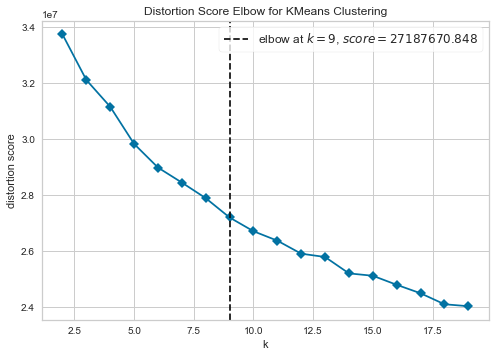

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [329]:
visualizer.fit(principal)
visualizer.show()

Perform the kMeans ++ with K = 9

In [330]:
model = KMeans(n_clusters = 9, init = 'k-means++', random_state = 42)

In [331]:
model.fit(principal)

KMeans(n_clusters=9, random_state=42)

In [332]:
y_true = model.predict(principal)

__Characterize your clusters using 5-10 variables__

```
variable = [track_duration,
            track_bit_rate,
            track_listens,
            track_interest,
            track_language_code]
```

In [241]:
variable = ['track_duration', 'track_language_code', 'track_listens', 'track_bit_rate']

In [341]:
quintile_listens = list(df2['track_listens'].describe()[4:7])
listens_cluster = df2['track_listens'].apply(lambda row: classify_range(row, quintile_listens))

In [338]:
quintile_bit = list(df2['track_bit_rate'].describe()[4:7])
bit_cluster = df2['track_bit_rate'].apply(lambda row: classify_range(row, quintile_bit))

In [339]:
quintile_duration = list(df2['track_duration'].describe()[4:7])
duration_cluster = df2['track_duration'].apply(lambda row: classify_range(row, quintile_duration))

In [340]:
quintile_interest = list(df2['track_interest'].describe()[4:7])
interest_cluster = df2['track_interest'].apply(lambda row: classify_range(row, quintile_interest))

In [342]:
df2['track_language_code'] = df2['track_language_code'].fillna('NA')

In [344]:
variable = [duration_cluster, listens_cluster, df2['track_language_code'], bit_cluster, interest_cluster] 
name_var = ['duration track','listens track', 'Language', 'bit rate', 'track interest']

Pivot_table2 = []
for var,name in zip(variable,name_var):
    Pivot_table2.append(pd.crosstab(index = var, columns = y_true, rownames = [name],
           colnames = ['clusters']).apply(lambda row: round(row/row.sum()*100,2), axis = 0))

In [346]:
for i in range(len(Pivot_table2)):
    display(Pivot_table2[i])

clusters,0,1,2,3,4,5,6,7,8
duration track,,,,,,,,,
1,18.24,57.15,24.09,18.53,15.69,40.0,34.51,47.14,31.09
2,26.48,16.05,19.43,23.41,23.60,20.0,25.24,14.29,29.11
3,29.78,13.61,21.50,28.73,29.08,20.0,18.55,12.86,22.08
4,25.50,13.19,34.98,29.33,31.63,20.0,21.71,25.71,17.72


clusters,0,1,2,3,4,5,6,7,8
listens track,,,,,,,,,
1,20.07,33.18,20.83,24.33,25.49,40.0,21.55,11.43,31.00
2,22.72,28.69,20.81,26.28,25.29,40.0,21.77,35.71,28.04
3,26.80,22.47,25.73,26.23,25.29,20.0,23.06,31.43,23.54
4,30.40,15.66,32.63,23.16,23.93,0.0,33.62,21.43,17.42


clusters,0,1,2,3,4,5,6,7,8
Language,,,,,,,,,
NA,86.99,86.43,88.06,90.01,85.21,20.0,84.32,90.0,83.15
ar,0.01,0.00,0.02,0.00,0.01,0.0,0.04,0.0,0.00
az,0.00,0.00,0.00,0.00,0.00,0.0,0.02,0.0,0.00
bg,0.00,0.00,0.07,0.00,0.00,0.0,0.01,0.0,0.00
bm,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00
cs,0.00,0.00,0.00,0.00,0.01,0.0,0.00,0.0,0.02
de,0.10,0.02,0.27,0.02,0.02,0.0,0.09,0.0,0.02
ee,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.03
el,0.00,0.02,0.00,0.00,0.00,0.0,0.03,0.0,0.01


clusters,0,1,2,3,4,5,6,7,8
bit rate,,,,,,,,,
1,25.26,25.36,26.51,18.69,25.33,0.0,29.30,15.71,27.04
2,26.08,25.46,21.35,17.72,20.79,60.0,24.62,30.00,30.72
3,48.31,48.37,51.63,62.99,53.39,40.0,45.69,52.86,41.76
4,0.35,0.81,0.51,0.61,0.49,0.0,0.40,1.43,0.47


clusters,0,1,2,3,4,5,6,7,8
track interest,,,,,,,,,
1,20.70,32.55,20.79,24.42,24.53,0.0,20.56,20.00,31.40
2,22.45,28.73,21.87,25.81,25.68,60.0,22.74,28.57,27.69
3,26.57,23.22,25.63,26.18,25.05,20.0,23.67,30.00,23.60
4,30.28,15.50,31.71,23.58,24.74,20.0,33.03,21.43,17.31


Genre:

In [347]:
df2['track_genre_top'] = df2['track_genre_top'].fillna('NA')

In [349]:
Genre_pivot2 = pd.crosstab(index = df2['track_genre_top'], columns = y_true, rownames = ['Genre'],
                   colnames = ['clusters']).apply(lambda row: round(row/row.sum()*100,2), axis = 0)
display(Genre_pivot2)

clusters,0,1,2,3,4,5,6,7,8
Genre,,,,,,,,,
Blues,0.21,0.00,0.15,0.03,0.07,0.0,0.12,0.00,0.07
Classical,0.43,0.02,5.70,0.05,0.13,0.0,5.01,0.00,0.08
Country,0.39,0.08,0.06,0.04,0.08,0.0,0.08,0.00,0.26
Easy Listening,0.03,0.00,0.03,0.01,0.05,0.0,0.03,0.00,0.00
Electronic,5.51,9.67,5.21,17.30,16.24,0.0,3.59,10.00,5.00
Experimental,6.64,20.42,11.81,9.87,11.32,0.0,10.36,7.14,9.02
Folk,6.19,0.55,3.36,0.40,0.63,0.0,5.03,0.00,1.27
Hip-Hop,1.34,1.22,0.52,5.58,9.08,0.0,0.23,0.00,2.38
Instrumental,2.51,1.71,3.35,0.91,0.74,0.0,5.13,2.86,1.05


Because we have a lot of more rows we have: 54% of missing data on the genre of a track, we do as before.

In [352]:
(df2['track_genre_top'] == 'NA').sum() / df2.shape[0] * 100

53.461444630022335

In [350]:
Genre_pivot2_2 = Genre_pivot2.drop('NA', axis = 0)

In [351]:
Genre_pivot2_2.idxmax(axis = 0)

clusters
0            Rock
1    Experimental
2    Experimental
3      Electronic
4      Electronic
5           Blues
6    Experimental
7      Electronic
8            Rock
dtype: object

__[DA COMMENTARE]__